# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
import math
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import scipy.stats
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import gc,os,sys
from sklearn.model_selection import train_test_split
import re
from matplotlib.pyplot import cm
from sklearn.neighbors import DistanceMetric
from collections import Counter
from sklearn import metrics, preprocessing
import datetime
from sklearn.cluster import DBSCAN
import altair as alt
import matplotlib.ticker as ticker
from sklearn import preprocessing
import sklearn
import xgboost as xgb
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import zscore
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#input location according to my drive location
%%time
train_data = pd.read_csv('/content/drive/My Drive/HW2/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/HW2/test.csv')


CPU times: user 58.3 ms, sys: 20 ms, total: 78.3 ms
Wall time: 10.6 s


In [5]:
print('train data shape:',train_data.shape)
print('test data shape',test_data.shape)

train data shape: (1460, 81)
test data shape (1459, 80)


In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,"1,961.000",Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,"1,329.000",GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,"1,958.000",Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,"1,997.000",Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,"1,998.000",Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,"1,017.000","1,280.000",GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,"1,992.000",RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Part 1 - Pairwise Correlations

In [8]:
# TODO: show visualization
numerical_features = train_data.select_dtypes(include=['int64','float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

print('numerical features:',list(numerical_features))
print('categorical features:',list(categorical_features))

numerical features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepla

from the above types of features, the following seemed to be the most relevant to me to find correlation:
'SalePrice'
'YrSold'
'YearBuilt'
'GarageYrBlt'
'OverallCond'
'LotArea'
'OverallQual'
'GarageQual'
'KitchenQual'
'LotFrontage'
'Heating'
'FullBath'
'Neighborhood'
'Electrical'
'SaleCondition'


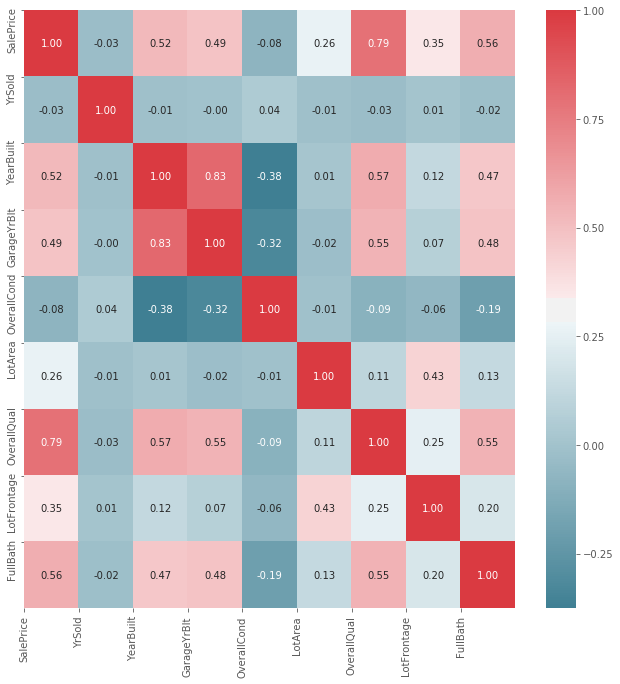

In [9]:
# Let's take a look at the correlation between numerical features
list_of_features_1 = ['YrSold', 'YearBuilt' ,'GarageYrBlt' ,'OverallCond', 'LotArea' ,'OverallQual', 'GarageQual', 'KitchenQual','Neighborhood'] 
list_of_features_2 = ['LotFrontage' ,'FullBath', 'Neighborhood', 'Electrical' ,'SaleCondition']
for i in list_of_features_2:
  list_of_features_1.append(i)
correlation_values = train_data[['SalePrice'] + list_of_features_1].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(11, 11))

colormap = sns.diverging_palette(220,11, as_cmap=True)

sns.heatmap(correlation_values, cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(len(correlation_values.columns)), correlation_values.columns);

plt.yticks(range(len(correlation_values.columns)), correlation_values.columns)

plt.show()

Discuss most positive and negative correlations.

**Most positive correleations: **
1.   Year Built and garage year built: 0.83; this is because most probably people build their garages when they build their houses.
2.   Sale Price and Overall Quality: 0.79; definitely the price of house will be related to its overall quality, better house will have better price

**Most negative correleations: **
1.   Year Built and overall condition: -0.38; conditions deteriorate with passing year.
2.   garage Year Built and overall condition: -0.32;same as above; conditions deteriorate with passing year.
3. Overall condition and full bath: -0.19; if there is no full bath then the overall condition won't be termed as well





## Part 2 - Informative Plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


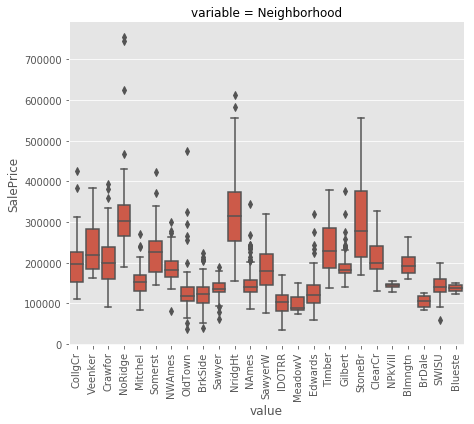

In [10]:
# TODO: code to generate Plot 1

# Count plots
f = pd.melt(train_data, id_vars=['SalePrice'], value_vars=['Neighborhood'])
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=6)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

What interesting properties does Plot 1 reveal?

The first plot is a count plot, describing the number of houses in a neighborhood sold for a particular price. We can see which neighborhood stypically see a higher sale price and which neighborhoods see a lower sales price. This helps us to get an idea about the neighborhood quality. Also, we can see that neighborhood shows significant variance in the mean of SalePrice.

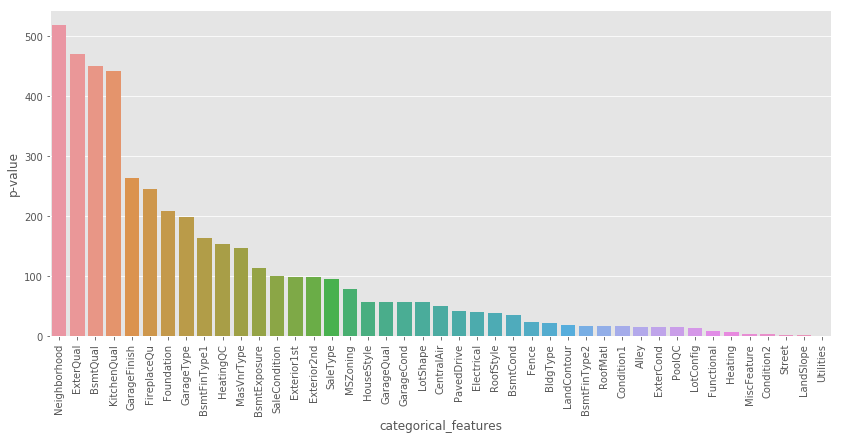

In [0]:
# TODO: code to generate Plot 2

#bar plot
train_data[categorical_features] = train_data[categorical_features].fillna('NA')
influence = {'categorical_features':[], 'f-statistic':[], 'p-value':[]}
i = 0
while i < len(categorical_features):
  price = []
  j = 0
  uniq_list = train_data[categorical_features[i]].unique()
  while j < len(uniq_list):
    price.append(train_data[train_data[categorical_features[i]]==uniq_list[j]]['SalePrice'].values)
    j += 1
  f_stat,p_val = scipy.stats.f_oneway(*price)
  influence['categorical_features'].append(categorical_features[i])
  influence['f-statistic'].append(f_stat)
  influence['p-value'].append(p_val)
  i+=1

influence = pd.DataFrame(influence)
influence = influence[['categorical_features','f-statistic','p-value']]
influence.sort_values('p-value', inplace=True)

plt.figure(figsize=(14,6))
sns.barplot(influence.categorical_features, np.log(1./influence['p-value']))
plt.xticks(rotation=90)
plt.show()


What interesting properties does Plot 2 reveal?

This plot depicts which categorical feature influences Sale Price more. Here we are calculating f-statistic and p-values. We know that p-value is directly proportional to f-statistic value. This enables us to reject null hypothesis properly. We see that Neighborhood has the greatest influence on sale price.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

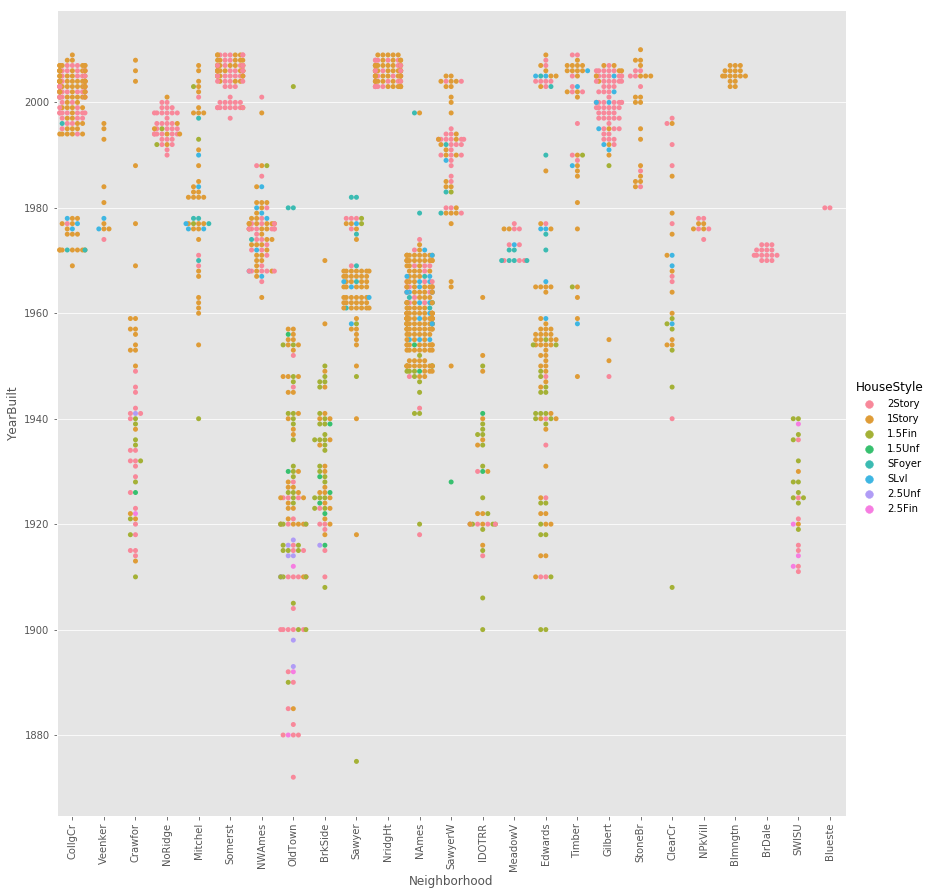

In [0]:
# TODO: code to generate Plot 3
#Swarming factor plot
N = 'Neighborhood'
T = 'YearBuilt'
Col = 'HouseStyle'
inp = train_data
plt.figure(figsize=(12,6))
sns.factorplot(x=N, y=T, hue=Col, data=inp, kind='swarm', size=12, aspect=1)
#ax = fig.axes[0][0]
plt.xticks(rotation=90)
plt.show()

What interesting properties does Plot 3 reveal?

This graph plots the year in which houses were built, at which neighborhood and what type of houses were built. We can see that Old town was the oldest neighborhood. We also see when the neighborhoods gradually came up, where we also saw that some neighborhoods came up in a short period of time. We also saw that most of the 2 story buildings came up after 1980s.

Relation between Sale Price and Overall Quality



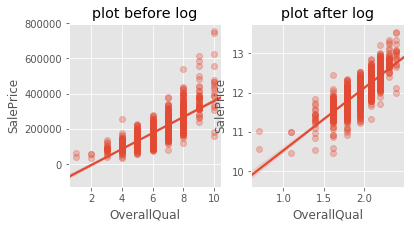

Relation between Sale Price and Total basement square feet



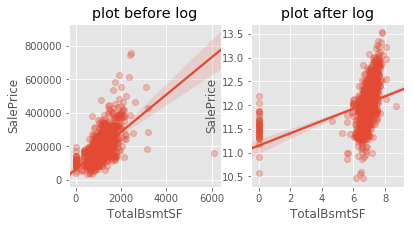

Relation between Sale Price and Living Area



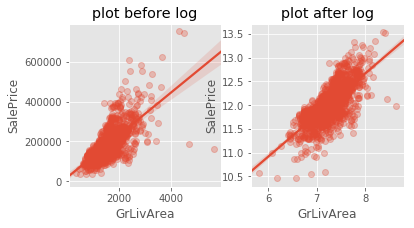

Relation between Sale Price and Total rooms above grade

After log transform


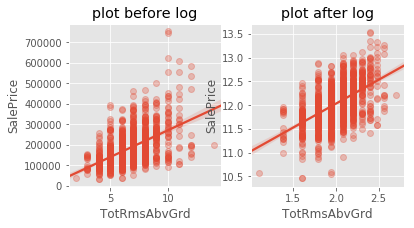

In [0]:
# TODO: code to generate Plot 4
#scatter plot
print('Relation between Sale Price and Overall Quality\n')
plt.figure(figsize=(6,3))
plt.subplot(121)
sns.regplot(train_data.OverallQual, train_data.SalePrice, scatter_kws={'alpha':0.3})
plt.title('plot before log')


plt.subplot(122)
sns.regplot(np.log1p(train_data.OverallQual), np.log1p(train_data.SalePrice), scatter_kws={'alpha':0.3})
plt.title('plot after log')
plt.show()


print('Relation between Sale Price and Total basement square feet\n')
plt.figure(figsize=(6,3))
plt.subplot(121)
sns.regplot(train_data.TotalBsmtSF, train_data.SalePrice, scatter_kws={'alpha':0.3})
plt.title('plot before log')


plt.subplot(122)
sns.regplot(np.log1p(train_data.TotalBsmtSF), np.log1p(train_data.SalePrice), scatter_kws={'alpha':0.3})
plt.title('plot after log')
plt.show()

print('Relation between Sale Price and Living Area\n')
plt.figure(figsize=(6,3))
plt.subplot(121)
sns.regplot(train_data.GrLivArea, train_data.SalePrice, scatter_kws={'alpha':0.3})
plt.title('plot before log')


plt.subplot(122)
sns.regplot(np.log1p(train_data.GrLivArea), np.log1p(train_data.SalePrice), scatter_kws={'alpha':0.3})
plt.title('plot after log')
plt.show()

print('Relation between Sale Price and Total rooms above grade\n')
plt.figure(figsize=(6,3))
plt.subplot(121)
sns.regplot(train_data.TotRmsAbvGrd, train_data.SalePrice, scatter_kws={'alpha':0.3})
plt.title('plot before log')

print('After log transform')
plt.subplot(122)
sns.regplot(np.log1p(train_data.TotRmsAbvGrd), np.log1p(train_data.SalePrice), scatter_kws={'alpha':0.3})
plt.title('plot after log')
plt.show()

What interesting properties does Plot 4 reveal?

Scatter plots do help us to see the correlation between the two quantities on x and y axis. From the above four plots we see that there is strong correlation between Sale Price and Overall quality, total rooms above grade, living area, basement area. This aligns with our initial correlation results as we see price will be higher for bigger rooms and better quality. If we do not take log then the distribution can be seen as more skewed, but with log we see that the relation is more linear.

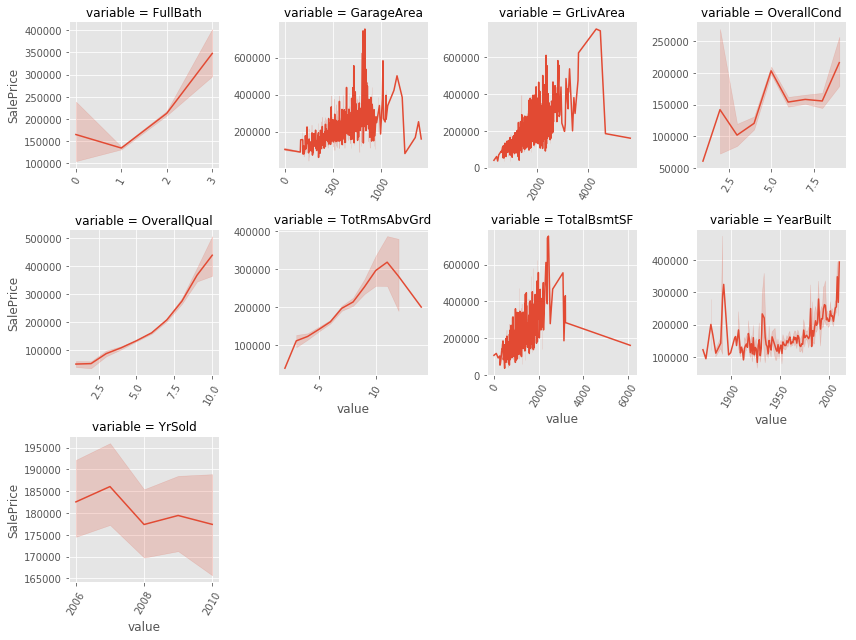

In [0]:
#TODO: code to generate Plot 5
#line plot
numerical_features=['OverallQual','OverallCond','YearBuilt','TotalBsmtSF','GrLivArea', 'FullBath','TotRmsAbvGrd', 'GarageArea','YrSold']
# Scatter plots of numerical features against SalePrice
f = pd.melt(train_data, id_vars=['SalePrice'], value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.lineplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

What interesting properties does Plot 5 reveal?

From the above line plots we can see that Sales Price has gone down as the years have gone by, which tells that the market has not been that great. Also, we see that if basement area is too much then the price of house is pretty low, this may be due to the fact that most of the house is just about the basement and not well built. As predicted above we do see that overall quality and condition is directly proportional to the sales price. One interesting fact to notice is that for houses built before 1900 the prices are higher compared to the later years, this may be due to the historical value of the properties.

## Part 3 - Handcrafted Scoring Function

In [0]:
# TODO: code for scoring function

# Attributes for desirability
attributes = []
key = ['Id']
numeric_dt = ['FullBath','TotRmsAbvGrd','BedroomAbvGr']
area_detail = ['TotalBsmtSF','GrLivArea','1stFlrSF','LotArea']
period = ['YearBuilt','YrSold']
condition = ['OverallCond','OverallQual']

attributes = numeric_dt + area_detail + period + condition
fin_attributes = key + attributes

The attributes I chose to check desirability: 'FullBath','TotRmsAbvGrd','BedroomAbvGr','TotalBsmtSF','GrLivArea','1stFlrSF','LotArea','YearBuilt','YrSold','OverallCond','OverallQual'
Out of these, YearSold and TotalBsmtSF is a inversely proportional desirability factor as we saw from parts above

In [0]:
#seeing the distribution of these attributes
des_frame = train_data[fin_attributes]
des_frame[attributes].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FullBath,"1,460.000",1.565,0.551,0.000,1.000,2.000,2.000,3.000
TotRmsAbvGrd,"1,460.000",6.518,1.625,2.000,5.000,6.000,7.000,14.000
BedroomAbvGr,"1,460.000",2.866,0.816,0.000,2.000,3.000,3.000,8.000
TotalBsmtSF,"1,460.000","1,057.429",438.705,0.000,795.750,991.500,"1,298.250","6,110.000"
GrLivArea,"1,460.000","1,515.464",525.480,334.000,"1,129.500","1,464.000","1,776.750","5,642.000"
1stFlrSF,"1,460.000","1,162.627",386.588,334.000,882.000,"1,087.000","1,391.250","4,692.000"
LotArea,"1,460.000","10,516.828","9,981.265","1,300.000","7,553.500","9,478.500","11,601.500","215,245.000"
YearBuilt,"1,460.000","1,971.268",30.203,"1,872.000","1,954.000","1,973.000","2,000.000","2,010.000"
YrSold,"1,460.000","2,007.816",1.328,"2,006.000","2,007.000","2,008.000","2,009.000","2,010.000"
OverallCond,"1,460.000",5.575,1.113,1.000,5.000,5.000,6.000,9.000


In [0]:
#removing missing values
des_frame_upd = des_frame.dropna(axis=0, how='any')

In [0]:
#applying z score to the attributes to get our initial scoring features
scoring_features = des_frame_upd.apply(zscore)

z-score doesn't give a very standard range of distribution. So after this we will apply our own weighted scoring function.

In [0]:
s1 =  (-1 * scoring_features['YearBuilt'])+(.05 * scoring_features['TotalBsmtSF'])+(.1 * scoring_features['FullBath'])+(.1 * scoring_features['LotArea']) 
s2 =  (.1 * scoring_features['1stFlrSF'])+ (.2 * scoring_features['BedroomAbvGr']) - scoring_features['YrSold']
s3 =  (2*scoring_features['TotRmsAbvGrd']) + (.2 * scoring_features['GrLivArea'])
s4 =  (2 * scoring_features['OverallCond']) + (2*scoring_features['OverallQual'])
scores = s1 + s2 + s3 + s4


In [0]:
#getting indexes for top 10 desired and least 10 desired houses
high_keys = scores.nlargest(10).index.values
low_keys = scores.nsmallest(10).index.values

What is the ten most desirable houses?

In [0]:
#getting the top 10 desired houses
des_frame_upd.iloc[high_keys].head(10)

,Id,FullBath,TotRmsAbvGrd,BedroomAbvGr,TotalBsmtSF,GrLivArea,1stFlrSF,LotArea,YearBuilt,YrSold,OverallCond,OverallQual
185,186,2,12,4,1107,3608,1518,22950,1892,2006,9,10
583,584,3,9,3,1237,2775,1521,13500,1893,2008,9,10
1268,1269,3,11,4,728,3447,1968,14100,1935,2008,9,8
635,636,2,14,8,1440,3395,1440,10896,1914,2007,7,6
304,305,3,10,3,1470,3493,1675,18386,1880,2008,9,7
745,746,3,11,4,1142,2715,1175,8963,1976,2008,9,8
190,191,2,10,3,853,2727,1549,10570,1932,2007,8,8
1298,1299,2,12,3,6110,5642,4692,63887,2008,2008,5,10
991,992,1,8,4,916,1742,916,17671,1882,2009,9,8
691,692,3,10,4,2444,4316,2444,21535,1994,2007,6,10


What is the ten least desirable houses?

In [0]:
#getting the least 10 desired houses
des_frame_upd.iloc[low_keys].head(10)

,Id,FullBath,TotRmsAbvGrd,BedroomAbvGr,TotalBsmtSF,GrLivArea,1stFlrSF,LotArea,YearBuilt,YrSold,OverallCond,OverallQual
375,376,0,4,1,683,904,904,10020,1922,2009,1,1
533,534,1,2,1,0,334,334,5000,1946,2007,3,1
636,637,1,4,1,264,800,800,6120,1936,2009,3,2
1000,1001,1,4,2,0,944,944,10206,1952,2009,3,3
916,917,0,4,1,480,480,480,9000,1949,2006,3,2
250,251,1,6,3,728,1306,1306,5350,1940,2010,2,3
1039,1040,1,3,1,630,630,630,1477,1970,2009,4,4
1100,1101,1,3,1,290,438,438,8400,1920,2009,5,2
344,345,1,4,3,536,1112,536,2592,1976,2010,3,5
1380,1381,1,5,2,864,864,864,8212,1914,2010,3,3


Describe your scoring function and how well you think it worked.



1.   I have taken ranges between -5 to 5 and have assigned weights to the attributes depending on their importance as we saw in question 2 f-statistic and p-score distribution.
2.   Scoring function = (-1 * ['YearBuilt'])+(.05 * ['TotalBsmtSF'])+(.1 * ['FullBath'])+(.1 * ['LotArea']) + (.1 * ['1stFlrSF'])+ (.2 * ['BedroomAbvGr']) - ['YrSold']+ (2*['TotRmsAbvGrd']) + (.2 * ['GrLivArea'])+ (2 * ['OverallCond']) + (2*['OverallQual'])
3. Here, I gave higher weights to factors like overall condition and quality and lower weights to factors like number of baths. Also, I've subtracted the scores for inverse factors like year sold and year built. Year built is an exception as houses before 1900s have high value due to historical importance.
4. The function seems to perform pretty well, we can see that high quality and high condition houses are more desirable and vice versa. Similarly for other factors like larger area and more number of baths and rooms are more desirable and vice versa.

## Part 4 - Pairwise Distance Function

In [0]:
# TODO: code for distance function
#utilising numerical properties and build info to get similarities in location
attrib = ['Street', 'Alley', 'LandContour' , 'LandSlope', 'Condition1', 'Condition2','YearBuilt','FullBath','LotArea','TotRmsAbvGrd','GrLivArea']
loc_info = train_data[attrib]
#removing missing value rows
loc_info = loc_info.dropna(how='any',axis=0)

In [0]:
#implementing Gower distance function
def gower_func(data_frm):
    for i in range(data_frm.shape[1]):
        feat = data_frm.iloc[:,[i]]
        if feat.dtypes[0] == np.object:
            feat_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feat))
        else:
            feat_dist = DistanceMetric.get_metric('manhattan').pairwise(feat) / np.ptp(feat.values)      
    return feat_dist

In [168]:
most_des_house = des_frame_upd.iloc[high_keys]
least_des_house = des_frame_upd.iloc[low_keys]

#similarity scores between top 5 desirable and least 5 desirable houses (houses 0-4 are top, houses 5-9 are bottom)
similairty = most_des_house[:5].append(least_des_house[5:10])
D = gower_func(similairty)
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9
0,0.000,0.000,0.250,0.500,0.375,0.875,0.750,1.000,0.625,0.875
1,0.000,0.000,0.250,0.500,0.375,0.875,0.750,1.000,0.625,0.875
2,0.250,0.250,0.000,0.250,0.125,0.625,0.500,0.750,0.375,0.625
3,0.500,0.500,0.250,0.000,0.125,0.375,0.250,0.500,0.125,0.375
4,0.375,0.375,0.125,0.125,0.000,0.500,0.375,0.625,0.250,0.500
5,0.875,0.875,0.625,0.375,0.500,0.000,0.125,0.125,0.250,0.000
6,0.750,0.750,0.500,0.250,0.375,0.125,0.000,0.250,0.125,0.125
7,1.000,1.000,0.750,0.500,0.625,0.125,0.250,0.000,0.375,0.125
8,0.625,0.625,0.375,0.125,0.250,0.250,0.125,0.375,0.000,0.250
9,0.875,0.875,0.625,0.375,0.500,0.000,0.125,0.125,0.250,0.000




1.   We observe that the top 5 most preferable houses from 0-4 are extremely closer to each other given they have similar properties and also simialr access to nearby locations and geographic terrain
2.   However, the least desirable houses from 5-9 are not similar to the top 5 as they have different properties and rightly so
3. For geographic similarities I used the attributes: Alley, Street, Condition1, Condition2, LandSlope, LandContour



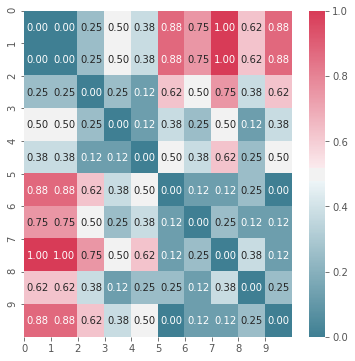

In [169]:
#heatmap describing the similarity and dissimalirity
fig, ax = plt.subplots(figsize=(6, 6))

colormap = sns.diverging_palette(220,6, as_cmap=True)

sns.heatmap(pd.DataFrame(D), cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(len(pd.DataFrame(D).columns)), pd.DataFrame(D).columns);

plt.yticks(range(len(pd.DataFrame(D).columns)), pd.DataFrame(D).columns)

plt.show()

How well does the distance function work? When does it do well/badly?

**How well does the distance function work?**

1.   For the distance funtion I implemented the gower distance function which allowed me to get similarity between categorical values as well. To consider closeness there were not many properties apart from neighborhood that could have been used. However, it was mentioned not to use the neighborhood information, so I used few numerical data to get some trends on similarity and most of the other location related data were categorical so I used the gower function. I utilised the number of houses, baths, area, total rooms to get an estimate of how similar the properties were apart from the location similarities. From the above heatmap or the table we can see that the top 5 most desirable houses are closer to each other because they are similar in listing and location, whereas the bottom three houses differ a lot in description from the top houses and hence they are father away in similarity from them.

**When does it do well/badly?**
2.   The function does well for houses at extreme ends of similarity. But, for listings which are in the mid range of desirability, it won't show much distinction in properties and hence their similarity is pretty scattered.



## Part 5 - Clustering

In [0]:
# TODO: code for clustering and visualization
# Creating the DBSCAN Clustering Object
Gower_dist = gower_distance(loc_info[attrib])
GD = pd.DataFrame(Gower_dist)
dist_arr = []
dist_arr.append(Gower_dist)
X = np.array(dist_arr).mean(0)

In [243]:
km = sklearn.cluster.KMeans(n_clusters=10)
km.fit(GD.as_matrix())
labels = km.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
results = pd.DataFrame(data=labels, columns=['cluster'], index=GD.index)

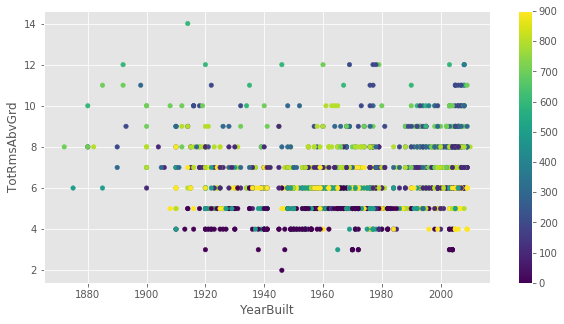

In [237]:

loc_info.plot(kind='scatter',x = 'YearBuilt', y= 'TotRmsAbvGrd', c=(results['cluster'] * 100),figsize=(10,5),cmap='viridis',sharex=False)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x288 with 0 Axes>

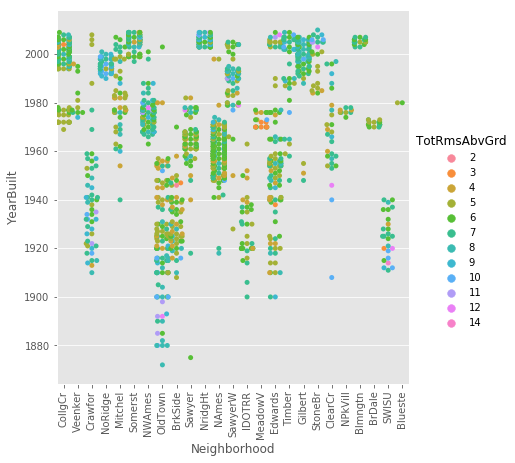

In [241]:
#comparing neighbourhood data 
N = 'Neighborhood'
T = 'YearBuilt'
Col = 'TotRmsAbvGrd'
inp = train_data
plt.figure(figsize=(8,4))
sns.factorplot(x=N, y=T, hue=Col, data=inp, kind='swarm', size=6, aspect=1)
#ax = fig.axes[0][0]
plt.xticks(rotation=90)
plt.show()

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.



1.   Since, we had to analyse neighborhood information as well, hence it was important to analyse location based information like alley, street etc. However, they are categorical data, hence we could not use conventional clustering methods directly. Hence, I used the gower distance function and then applied K-means clustering. I used 10 clusters.
2.   The clusters are trying to depict a trend over the years with respect to total rooms. We observed that the location based attributes along with the numerical attributes were able to capture similarity between the visualization below regarding neighborhood.
3. The clusters depict lot of similarity with the neighborhood distribution below. We observe that around 1940, there were houses mostly with 2-5 rooms and they were concentrated around Ames, OldTown, BrkSide areas. The same was observed with the clustering data as well, where we saw that during 1940s most of the houses had rooms 2-6 and were concentrated within a confined locality, from which we can say that they belong to similar neighborhoods.



## Part 6 - Linear Regression

In [0]:
#input location according to my drive location
train_data_new = pd.read_csv('/content/drive/My Drive/HW2/train.csv')
test_data_new = pd.read_csv('/content/drive/My Drive/HW2/test.csv')


In [42]:
#selecting attributes to be used for prediction
attribute_val = ['SalePrice','Neighborhood', 'OverallCond', 'OverallQual', 'TotalBsmtSF','SalePrice','TotRmsAbvGrd','FullBath']
print(attribute_val)

['SalePrice', 'Neighborhood', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'SalePrice', 'TotRmsAbvGrd', 'FullBath']


In [0]:
#creating data frames
des_frame = train_data_new[attribute_val]
des_frame[attribute_val].describe().transpose()
#removing missing values
des_frame_upd = des_frame.dropna(axis=0, how='any')


In [366]:
#print(des_frame_upd.shape)
des_frame_upd.head()

,SalePrice,Neighborhood,OverallCond,OverallQual,TotalBsmtSF,SalePrice,TotRmsAbvGrd,FullBath
0,208500,CollgCr,5,7,856,208500,8,2
1,181500,Veenker,8,6,1262,181500,6,2
2,223500,CollgCr,5,7,920,223500,6,2
3,140000,Crawfor,5,7,756,140000,7,1
4,250000,NoRidge,5,8,1145,250000,9,2


In [0]:
# Get one hot encoding of columns Neighborhood since it is categorical
one_hot = pd.get_dummies(des_frame_upd['Neighborhood'])
des_frame_upd = des_frame_upd.drop('Neighborhood',axis = 1)
des_frame_upd = des_frame_upd.join(one_hot)

In [0]:
# TODO: code for linear regression
#splitting data into training and testing set
X = des_frame_upd.iloc[:, 1:].values
y = des_frame_upd.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [373]:
#applying linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [360]:
y_pred = regressor.predict(X_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print actual prices vs predicted prices
predictions

,Actual,Predicted
0,200624,"200,624.000"
1,133000,"133,000.000"
2,110000,"110,000.000"
3,192000,"192,000.000"
4,88000,"88,000.000"
5,85000,"85,000.000"
6,282922,"282,922.000"
7,141000,"141,000.000"
8,745000,"745,000.000"
9,148800,"148,800.000"


From the above results we can see that our linear regression model is highly accurate

In [354]:
#evaluation metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.2559368510360586e-11
Mean Squared Error: 3.791342678292365e-21
Root Mean Squared Error: 6.157387983790176e-11


How well/badly does it work? Which are the most important variables?

The linear regression model performs really well as we see above the losses and error are extremely small. I took the most important numerical variables as I observed high correlation between them and sales prices. Neighborhood data is extremely correlated with SalePrice, so using it has given this high performance

## Part 7 - External Dataset

In [0]:
# TODO: code to import external dataset and test
ames_dataset = pd.read_csv('/content/drive/My Drive/HW2/AmesHousing.csv')
ames_dataset.rename(columns = {'Order':'Id'}, inplace = True)
ames_dataset.rename(columns = {'Overall Cond':'OverallCond'}, inplace = True)
ames_dataset.rename(columns = {'Overall Qual':'OverallQual'}, inplace = True)
ames_dataset.rename(columns = {'Total Bsmt SF':'TotalBsmtSF'}, inplace = True)
ames_dataset.rename(columns = {'TotRms AbvGrd':'TotRmsAbvGrd'}, inplace = True)
ames_dataset.rename(columns = {'Full Bath':'FullBath'}, inplace = True)

train_data_old = pd.read_csv('/content/drive/My Drive/HW2/train.csv')
frames = [train_data_old,ames_dataset]
train_merged = pd.concat(frames,join='inner', ignore_index=True)

In [0]:
#creating data frames
des_frame = train_merged[attribute_val]
des_frame[attribute_val].describe().transpose()
#removing missing values
des_frame_upd = des_frame.dropna(axis=0, how='any')

In [0]:
# Get one hot encoding of columns Neighborhood since it is categorical
one_hot = pd.get_dummies(des_frame_upd['Neighborhood'])
des_frame_upd = des_frame_upd.drop('Neighborhood',axis = 1)
des_frame_upd = des_frame_upd.join(one_hot)

In [0]:
# TODO: code for linear regression
#splitting data into training and testing set
X = des_frame_upd.iloc[:, 1:].values
y = des_frame_upd.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
#applying linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print actual prices vs predicted prices
predictions

,Actual,Predicted
0,149900,"149,900.000"
1,230000,"230,000.000"
2,185000,"185,000.000"
3,239000,"239,000.000"
4,360000,"360,000.000"
5,119000,"119,000.000"
6,348000,"348,000.000"
7,152000,"152,000.000"
8,144000,"144,000.000"
9,111000,"111,000.000"


In [57]:
#evaluation metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8191965777376043e-11
Mean Squared Error: 1.1741103363445734e-21
Root Mean Squared Error: 3.426529346648841e-11


Describe the dataset and whether this data helps with prediction.

The external

1.   External data set chosen = AmesHousing.csv, the reason to choose this dataset: It has exactly same information as our dataset but has more data in it. Hence, it will be easy to integrate as we can concatenate the extra values from this dataset to our own.
2.   Advantage: By doing so, we will have more data to train our model, as a result the prediction will get better. Also, there will be no data anomalies as both the datasets carry same information. The column names however have different formatting which can be handled easily.
3. As seen above, I've concatenated the extra information in our original dataset and now we have more data to work on. 
4. The column to be joined on is Order from the new dataset and Id from our original dataset.
5. I again did the prediction using a simple linear regression model and it reduced the errors further, thereby supporting my intuition of improving the model with more data.



## Part 8 - Permutation Test

In [0]:
data = pd.read_csv('/content/drive/My Drive/HW2/train.csv')

In [0]:
# TODO: code for all permutation tests
single_var = ['Neighborhood', 'OverallCond', 'OverallQual', 'TotalBsmtSF','ExterQual','TotRmsAbvGrd','FullBath','GarageCars','YearBuilt','LotArea']

In [69]:
from sklearn.model_selection import permutation_test_score
import warnings
warnings.filterwarnings("ignore")
for i in range(10):
  print(str(i+1)+': Analysis for variable: '+ str(single_var[i]),'\n')
  attribute_val = ['SalePrice']
  attribute_val.append(single_var[i])
  #creating data frames
  des_frame = data[attribute_val]
  des_frame[attribute_val].describe().transpose()
  #removing missing values
  des_frame_upd = des_frame.dropna(axis=0, how='any')

  if str(single_var[i]) == 'Neighborhood' or str(single_var[i]) == 'ExterQual':
      one_hot = pd.get_dummies(des_frame_upd[str(single_var[i])])
      des_frame_upd = des_frame_upd.drop(str(single_var[i]),axis = 1)
      des_frame_upd = des_frame_upd.join(one_hot)
      
  X = des_frame_upd.iloc[:, 1:].values
  y = des_frame_upd.iloc[:, 0].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
  #print actual prices vs predicted prices
  score, permutation_scores, pvalue = permutation_test_score(regressor, X_train, y_train, scoring=None, cv=None, n_permutations=100, n_jobs=1)
  print("Prediction score by permutation test: %s and pvalue : %s" % (score, pvalue))
  #evaluation metrics
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)),'\n')

1: Analysis for variable: Neighborhood 

Prediction score by permutation test: -2.2594413776210423e+24 and pvalue : 0.7227722772277227
Root Mean Squared Error: 58880.64828724313 

2: Analysis for variable: OverallCond 

Prediction score by permutation test: -0.008905844733122614 and pvalue : 0.7722772277227723
Root Mean Squared Error: 82496.54451353129 

3: Analysis for variable: OverallQual 

Prediction score by permutation test: 0.6195556387468169 and pvalue : 0.009900990099009901
Root Mean Squared Error: 50724.44275356876 

4: Analysis for variable: TotalBsmtSF 

Prediction score by permutation test: 0.3935049428200657 and pvalue : 0.009900990099009901
Root Mean Squared Error: 71256.76151168297 

5: Analysis for variable: ExterQual 

Prediction score by permutation test: 0.46148782999135546 and pvalue : 0.009900990099009901
Root Mean Squared Error: 59056.77055254453 

6: Analysis for variable: TotRmsAbvGrd 

Prediction score by permutation test: 0.2875940737633805 and pvalue : 0.009

Describe the results.



1.   Variables tested on : ['Neighborhood', 'OverallCond', 'OverallQual', 'TotalBsmtSF','SalePrice','TotRmsAbvGrd','FullBath','GarageCars','YearBuilt','LotArea']
2.   Overall results: Since, prediction was done only on the basis of one variable the model did not perform very well
3. I've described the performance of each variable in the output above
4. Although the performance is not good, but better results are obtained for neighborhood, exterqual and overallqual as we know that they have high correlation with sale price



## Part 9 - Final Result

In [0]:
train_data_sub = pd.read_csv('/content/drive/My Drive/HW2/train.csv')
test_data_sub = pd.read_csv('/content/drive/My Drive/HW2/test.csv')
y_train = train_data_sub['SalePrice'].copy()
X_train = train_data_sub.drop('SalePrice', axis=1)
sample_submission = pd.read_csv('/content/drive/My Drive/HW2/sample_submission.csv')

X_test = test_data_sub.copy()
X_train = X_train.fillna(-999)
X_test = X_test.fillna(-999)

for col in X_train.columns:
    if X_train[col].dtype=='object' or X_test[col].dtype=='object':
        label_enc = preprocessing.LabelEncoder()
        label_enc.fit(list(X_train[col].values) + list(X_test[col].values))
        X_train[col] = label_enc.transform(list(X_train[col].values))
        X_test[col] = label_enc.transform(list(X_test[col].values))

In [0]:
#xg boost model
model = xgb.XGBClassifier(max_depth=9, 
 learning_rate=0.05, 
 n_estimators=500, 
 verbosity=1, 
 silent=None, 
 objective='binary:logistic', 
 booster='gbtree', 
 n_jobs=1, 
 nthread=None, 
 gamma=0, 
 min_child_weight=1, 
 max_delta_step=0, 
 subsample=0.9, 
 colsample_bytree=1, 
 colsample_bylevel=1, 
 colsample_bynode=1, 
 reg_alpha=0, 
 reg_lambda=1, 
 scale_pos_weight=1, 
 base_score=0.5, 
 random_state=2019, 
 seed=None, 
 missing=-999, 
 tree_method='gpu_hist')

In [5]:
model.fit(X_train, y_train,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=-999, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=2019,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, tree_method='gpu_hist', verbosity=1)

In [11]:
  #linear regression model
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
sample_submission = pd.read_csv('/content/drive/My Drive/HW2/sample_submission.csv')
#using linear regression
sample_submission['SalePrice'] = regressor.predict(X_test)[:]
#using xgboost
#sample_submission['SalePrice'] = model.predict(X_test)[:,1]

In [0]:
#writing to csv file
sample_submission.to_csv('submission.csv')

In [0]:
#downloading the csv file
from google.colab import files
files.download('submission.csv')

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/mayukhmaitra18/account

Highest Rank: 4643

Score: 0.47709

Number of entries: 2

INCLUDE IMAGE OF YOUR KAGGLE RANKING

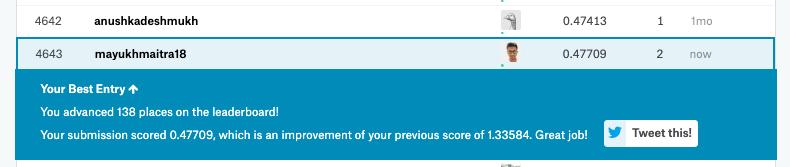

In [19]:
from IPython.display import Image
Image('/content/drive/My Drive/HW2/rank_screenshot.png')